In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [5]:
def print_number(number):
    if number < 1e-2:
        string = "${:.1e}".format(number)
        string = string.replace("e", "\\times 10^{") + "}$"
        return string
    elif number < 1:
        return "${:.1f}$".format(number)
    else:
        return "${:.0f}$".format(number)

In [6]:
# open a csv file and read it into a dataframe
cpu_df = pd.read_pickle('../data/henon_map_time_data_CPU.pkl')
cpu_normed_df = cpu_df.copy()


In [7]:
cpu_df

,10,100,1000,10000,100000,1000000
Sample size,,,,,,
10,0.000661,0.000160,0.000418,0.002671,0.024249,0.245164
100,0.000220,0.000287,0.000562,0.004198,0.033382,0.341325
1000,0.000155,0.000267,0.001325,0.014009,0.160763,1.346139
10000,0.000353,0.001156,0.012167,0.099402,1.008383,11.863688
100000,0.001418,0.010283,0.096588,1.023285,9.774641,115.672463
1000000,0.025991,0.110542,1.041233,10.013302,99.731425,1325.455904


In [8]:
# cycle through the dataframe columns
for col in cpu_normed_df.columns[1:]:
    cpu_normed_df[col] = cpu_normed_df[col] / float(col)

In [9]:
# cycle through the dataframe rows
for row in cpu_normed_df.index:
    cpu_normed_df.loc[row] = cpu_normed_df.loc[row] / float(row)

In [10]:
cpu_normed_df

,10,100,1000,10000,100000,1000000
Sample size,,,,,,
10,6.610000e-05,1.600000e-07,4.180000e-08,2.671000e-08,2.424900e-08,2.451640e-08
100,2.200000e-06,2.870000e-08,5.620000e-09,4.198000e-09,3.338200e-09,3.413250e-09
1000,1.550000e-07,2.670000e-09,1.325000e-09,1.400900e-09,1.607630e-09,1.346139e-09
10000,3.530000e-08,1.156000e-09,1.216700e-09,9.940200e-10,1.008383e-09,1.186369e-09
100000,1.418000e-08,1.028300e-09,9.658800e-10,1.023285e-09,9.774641e-10,1.156725e-09
1000000,2.599100e-08,1.105420e-09,1.041233e-09,1.001330e-09,9.973143e-10,1.325456e-09


In [11]:
# open a csv file and read it into a dataframe
gpu_df = pd.read_pickle('../data/henon_map_time_data_GPU.pkl')
gpu_normed_df = gpu_df.copy()


In [12]:
gpu_df

,10,100,1000,10000,100000,1000000
Sample size,,,,,,
10,0.000356,0.000290,0.001907,0.018305,0.180567,1.336230
100,0.000181,0.000232,0.001650,0.015774,0.156622,1.606603
1000,0.000187,0.000322,0.002394,0.023250,0.231671,2.340178
10000,0.000246,0.000462,0.002539,0.023515,0.234519,2.347794
100000,0.001249,0.002682,0.017009,0.160426,1.594084,15.938532
1000000,0.010098,0.024626,0.158653,1.498948,14.898831,148.908975


In [13]:
# cycle through the dataframe columns
for col in gpu_normed_df.columns[1:]:
    gpu_normed_df[col] = gpu_normed_df[col] / float(col)

In [14]:
# cycle through the dataframe rows
for row in gpu_normed_df.index:
    gpu_normed_df.loc[row] = gpu_normed_df.loc[row] / float(row)

In [15]:
gpu_normed_df

,10,100,1000,10000,100000,1000000
Sample size,,,,,,
10,3.560000e-05,2.900000e-07,1.907000e-07,1.830500e-07,1.805670e-07,1.336230e-07
100,1.810000e-06,2.320000e-08,1.650000e-08,1.577400e-08,1.566220e-08,1.606603e-08
1000,1.870000e-07,3.220000e-09,2.394000e-09,2.325000e-09,2.316710e-09,2.340178e-09
10000,2.460000e-08,4.620000e-10,2.539000e-10,2.351500e-10,2.345190e-10,2.347794e-10
100000,1.249000e-08,2.682000e-10,1.700900e-10,1.604260e-10,1.594084e-10,1.593853e-10
1000000,1.009800e-08,2.462600e-10,1.586530e-10,1.498948e-10,1.489883e-10,1.489090e-10


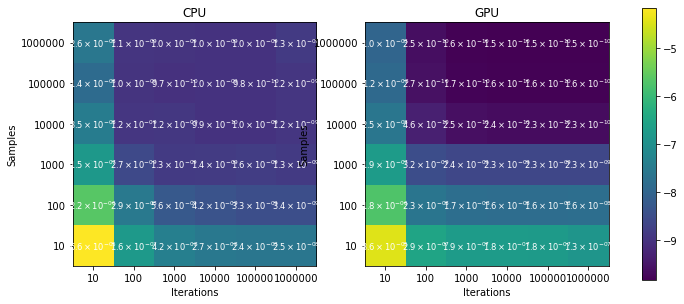

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# get minimum and maximum values from the dataframe
min_val = np.log10(min(cpu_normed_df.min().min(), gpu_normed_df.min().min()))
max_val = np.log10(max(cpu_normed_df.max().max(), gpu_normed_df.max().max()))

img = ax1.imshow(np.log10(cpu_normed_df), origin="lower", vmin=min_val, vmax=max_val, cmap="viridis")
ax1.set_title("CPU")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Samples")

# set x and y ticks using the dataframe index and column names
ax1.set_xticks(np.arange(len(cpu_normed_df.columns)))
ax1.set_xticklabels(cpu_normed_df.columns)
ax1.set_yticks(np.arange(len(cpu_normed_df.index)))
ax1.set_yticklabels(cpu_normed_df.index)

ax2.imshow(np.log10(gpu_normed_df), origin="lower", vmin=min_val, vmax=max_val, cmap="viridis")
ax2.set_title("GPU")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Samples")

# set x and y ticks using the dataframe index and column names
ax2.set_xticks(np.arange(len(gpu_normed_df.columns)))
ax2.set_xticklabels(gpu_normed_df.columns)
ax2.set_yticks(np.arange(len(gpu_normed_df.index)))
ax2.set_yticklabels(gpu_normed_df.index)

# add common colorbar
fig.colorbar(img, ax=[ax1, ax2])

# write the values of the heatmap to the plot
for i in range(len(cpu_normed_df.index)):
    for j in range(len(cpu_normed_df.columns)):
        ax1.text(j, i, print_number(
            cpu_normed_df.iloc[i, j]), ha="center", va="center", color="w", fontsize="small")

# write the values of the heatmap to the plot
for i in range(len(gpu_normed_df.index)):
    for j in range(len(gpu_normed_df.columns)):
        ax2.text(j, i, print_number(
            gpu_normed_df.iloc[i, j]), ha="center", va="center", color="w", fontsize="small")


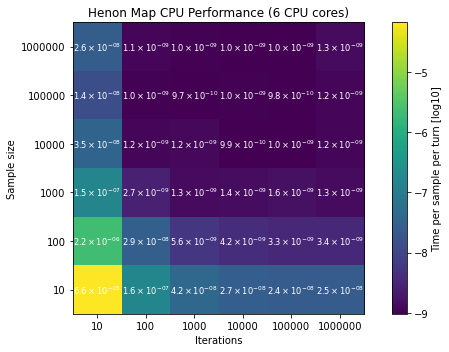

In [17]:
# Plot the dataframe as an heatmap
plt.figure(figsize=(8, 5))
plt.title('Henon Map CPU Performance (6 CPU cores)')
plt.xlabel('Iterations')
plt.ylabel('Sample size')
plt.imshow(np.log10(cpu_normed_df), origin="lower")
plt.colorbar(label="Time per sample per turn [log10]")

# assign labels to the x and y axis
plt.xticks(np.arange(0, len(cpu_normed_df.columns), 1), cpu_normed_df.columns)
plt.yticks(np.arange(0, len(cpu_normed_df.index), 1), cpu_normed_df.index)

# write the values of the heatmap to the plot
for i in range(len(cpu_normed_df.index)):
    for j in range(len(cpu_normed_df.columns)):
        plt.text(j, i, print_number(cpu_normed_df.iloc[i, j]), ha="center", va="center", color="w", fontsize="small")

plt.tight_layout()

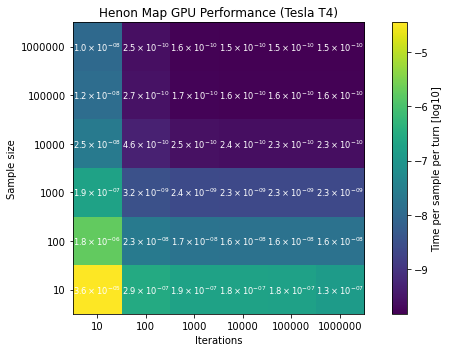

In [18]:
# Plot the dataframe as an heatmap
plt.figure(figsize=(8, 5))
plt.title('Henon Map GPU Performance (Tesla T4)')
plt.xlabel('Iterations')
plt.ylabel('Sample size')
plt.imshow(np.log10(gpu_normed_df), origin="lower")
plt.colorbar(label="Time per sample per turn [log10]")

# assign labels to the x and y axis
plt.xticks(np.arange(0, len(gpu_normed_df.columns), 1), gpu_normed_df.columns)
plt.yticks(np.arange(0, len(gpu_normed_df.index), 1), gpu_normed_df.index)

# write the values of the heatmap to the plot
for i in range(len(gpu_normed_df.index)):
    for j in range(len(gpu_normed_df.columns)):
        plt.text(j, i, print_number(gpu_normed_df.iloc[i, j]), ha="center", va="center", color="w", fontsize="small")

plt.tight_layout()

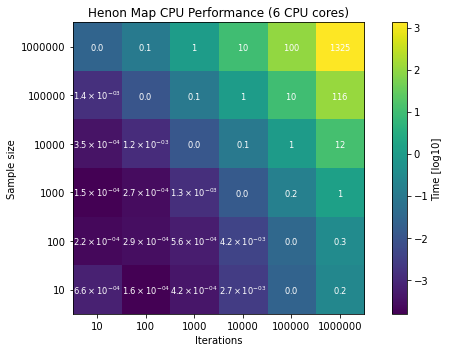

In [19]:
# Plot the dataframe as an heatmap
plt.figure(figsize=(8, 5))
plt.title('Henon Map CPU Performance (6 CPU cores)')
plt.xlabel('Iterations')
plt.ylabel('Sample size')
plt.imshow(np.log10(cpu_df), origin="lower")
plt.colorbar(label="Time [log10]")

# assign labels to the x and y axis
plt.xticks(np.arange(0, len(cpu_df.columns), 1), cpu_df.columns)
plt.yticks(np.arange(0, len(cpu_df.index), 1), cpu_df.index)

# write the values of the heatmap to the plot
for i in range(len(cpu_df.index)):
    for j in range(len(cpu_df.columns)):
        plt.text(j, i, print_number(
            cpu_df.iloc[i, j]), ha="center", va="center", color="w", fontsize="small")

plt.tight_layout()


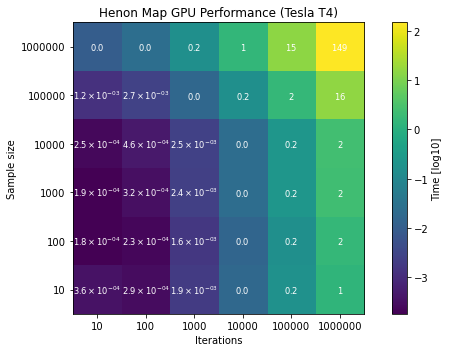

In [20]:
# Plot the dataframe as an heatmap
plt.figure(figsize=(8, 5))
plt.title('Henon Map GPU Performance (Tesla T4)')
plt.xlabel('Iterations')
plt.ylabel('Sample size')
plt.imshow(np.log10(gpu_df), origin="lower")
plt.colorbar(label="Time [log10]")

# assign labels to the x and y axis
plt.xticks(np.arange(0, len(gpu_df.columns), 1), gpu_df.columns)
plt.yticks(np.arange(0, len(gpu_df.index), 1), gpu_df.index)

# write the values of the heatmap to the plot
for i in range(len(gpu_df.index)):
    for j in range(len(gpu_df.columns)):
        plt.text(j, i, print_number(
            gpu_df.iloc[i, j]), ha="center", va="center", color="w", fontsize="small")

plt.tight_layout()


In [21]:
# open a csv file and read it into a dataframe
cpu_df = pd.read_pickle('../data/lhc_time_data_CPU.pkl')
cpu_normed_df = cpu_df.copy()


In [22]:
cpu_df

,1,10,100,1000,10000
Sample size,,,,,
1,0.010813,0.074426,0.642591,6.171968,60.643032
10,0.011742,0.087857,0.805822,7.941510,79.571560
100,0.034979,0.325983,3.077196,30.530564,303.472862
1000,0.307821,2.904933,28.965829,289.239296,2892.995461
10000,2.948863,29.404029,290.308335,2854.285845,28540.582451


In [23]:
# cycle through the dataframe columns
for col in cpu_normed_df.columns[1:]:
    cpu_normed_df[col] = cpu_normed_df[col] / float(col)

In [24]:
# cycle through the dataframe rows
for row in cpu_normed_df.index:
    cpu_normed_df.loc[row] = cpu_normed_df.loc[row] / float(row)

In [25]:
cpu_normed_df

,1,10,100,1000,10000
Sample size,,,,,
1,0.010813,0.007443,0.006426,0.006172,0.006064
10,0.001174,0.000879,0.000806,0.000794,0.000796
100,0.000350,0.000326,0.000308,0.000305,0.000303
1000,0.000308,0.000290,0.000290,0.000289,0.000289
10000,0.000295,0.000294,0.000290,0.000285,0.000285


In [26]:
# open a csv file and read it into a dataframe
gpu_df = pd.read_pickle('../data/lhc_time_data_GPU.pkl')
gpu_normed_df = gpu_df.copy()


In [27]:
gpu_df

,1,10,100,1000,10000
Sample size,,,,,
1,0.146536,0.389175,3.764945,37.537325,372.809618
10,0.050478,0.380050,3.757060,37.282416,372.756398
100,0.071404,0.594153,5.750163,57.579610,576.697257
1000,0.116331,0.974600,9.733466,97.133002,1108.773198
10000,0.323108,1.379325,13.144874,134.879749,1075.645046


In [28]:
# cycle through the dataframe columns
for col in gpu_normed_df.columns[1:]:
    gpu_normed_df[col] = gpu_normed_df[col] / float(col)

In [29]:
# cycle through the dataframe rows
for row in gpu_normed_df.index:
    gpu_normed_df.loc[row] = gpu_normed_df.loc[row] / float(row)

In [30]:
gpu_normed_df

,1,10,100,1000,10000
Sample size,,,,,
1,0.146536,0.038918,0.037649,0.037537,0.037281
10,0.005048,0.003801,0.003757,0.003728,0.003728
100,0.000714,0.000594,0.000575,0.000576,0.000577
1000,0.000116,0.000097,0.000097,0.000097,0.000111
10000,0.000032,0.000014,0.000013,0.000013,0.000011


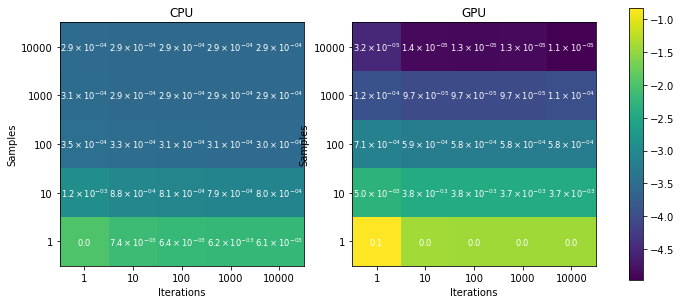

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# get minimum and maximum values from the dataframe
min_val = np.log10(min(cpu_normed_df.min().min(), gpu_normed_df.min().min()))
max_val = np.log10(max(cpu_normed_df.max().max(), gpu_normed_df.max().max()))

img = ax1.imshow(np.log10(cpu_normed_df), origin="lower", vmin=min_val, vmax=max_val, cmap="viridis")
ax1.set_title("CPU")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Samples")

# set x and y ticks using the dataframe index and column names
ax1.set_xticks(np.arange(len(cpu_normed_df.columns)))
ax1.set_xticklabels(cpu_normed_df.columns)
ax1.set_yticks(np.arange(len(cpu_normed_df.index)))
ax1.set_yticklabels(cpu_normed_df.index)

ax2.imshow(np.log10(gpu_normed_df), origin="lower", vmin=min_val, vmax=max_val, cmap="viridis")
ax2.set_title("GPU")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Samples")

# set x and y ticks using the dataframe index and column names
ax2.set_xticks(np.arange(len(gpu_normed_df.columns)))
ax2.set_xticklabels(gpu_normed_df.columns)
ax2.set_yticks(np.arange(len(gpu_normed_df.index)))
ax2.set_yticklabels(gpu_normed_df.index)

# add common colorbar
fig.colorbar(img, ax=[ax1, ax2])

# write the values of the heatmap to the plot
for i in range(len(cpu_normed_df.index)):
    for j in range(len(cpu_normed_df.columns)):
        ax1.text(j, i, print_number(
            cpu_normed_df.iloc[i, j]), ha="center", va="center", color="w", fontsize="small")

# write the values of the heatmap to the plot
for i in range(len(gpu_normed_df.index)):
    for j in range(len(gpu_normed_df.columns)):
        ax2.text(j, i, print_number(
            gpu_normed_df.iloc[i, j]), ha="center", va="center", color="w", fontsize="small")


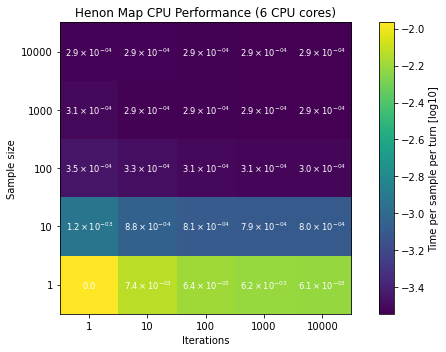

In [32]:
# Plot the dataframe as an heatmap
plt.figure(figsize=(8, 5))
plt.title('Henon Map CPU Performance (6 CPU cores)')
plt.xlabel('Iterations')
plt.ylabel('Sample size')
plt.imshow(np.log10(cpu_normed_df), origin="lower")
plt.colorbar(label="Time per sample per turn [log10]")

# assign labels to the x and y axis
plt.xticks(np.arange(0, len(cpu_normed_df.columns), 1), cpu_normed_df.columns)
plt.yticks(np.arange(0, len(cpu_normed_df.index), 1), cpu_normed_df.index)

# write the values of the heatmap to the plot
for i in range(len(cpu_normed_df.index)):
    for j in range(len(cpu_normed_df.columns)):
        plt.text(j, i, print_number(cpu_normed_df.iloc[i, j]), ha="center", va="center", color="w", fontsize="small")

plt.tight_layout()

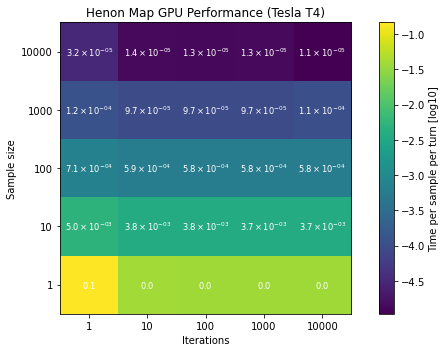

In [33]:
# Plot the dataframe as an heatmap
plt.figure(figsize=(8, 5))
plt.title('Henon Map GPU Performance (Tesla T4)')
plt.xlabel('Iterations')
plt.ylabel('Sample size')
plt.imshow(np.log10(gpu_normed_df), origin="lower")
plt.colorbar(label="Time per sample per turn [log10]")

# assign labels to the x and y axis
plt.xticks(np.arange(0, len(gpu_normed_df.columns), 1), gpu_normed_df.columns)
plt.yticks(np.arange(0, len(gpu_normed_df.index), 1), gpu_normed_df.index)

# write the values of the heatmap to the plot
for i in range(len(gpu_normed_df.index)):
    for j in range(len(gpu_normed_df.columns)):
        plt.text(j, i, print_number(gpu_normed_df.iloc[i, j]), ha="center", va="center", color="w", fontsize="small")

plt.tight_layout()

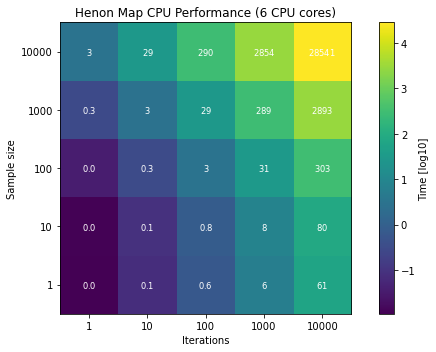

In [34]:
# Plot the dataframe as an heatmap
plt.figure(figsize=(8, 5))
plt.title('Henon Map CPU Performance (6 CPU cores)')
plt.xlabel('Iterations')
plt.ylabel('Sample size')
plt.imshow(np.log10(cpu_df), origin="lower")
plt.colorbar(label="Time [log10]")

# assign labels to the x and y axis
plt.xticks(np.arange(0, len(cpu_df.columns), 1), cpu_df.columns)
plt.yticks(np.arange(0, len(cpu_df.index), 1), cpu_df.index)

# write the values of the heatmap to the plot
for i in range(len(cpu_df.index)):
    for j in range(len(cpu_df.columns)):
        plt.text(j, i, print_number(
            cpu_df.iloc[i, j]), ha="center", va="center", color="w", fontsize="small")

plt.tight_layout()


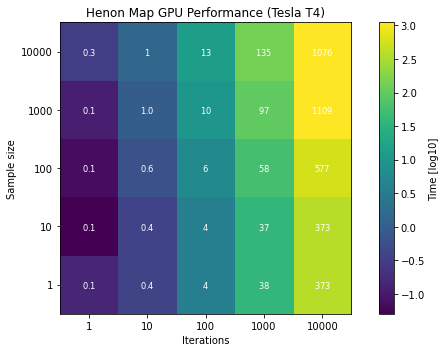

In [35]:
# Plot the dataframe as an heatmap
plt.figure(figsize=(8, 5))
plt.title('Henon Map GPU Performance (Tesla T4)')
plt.xlabel('Iterations')
plt.ylabel('Sample size')
plt.imshow(np.log10(gpu_df), origin="lower")
plt.colorbar(label="Time [log10]")

# assign labels to the x and y axis
plt.xticks(np.arange(0, len(gpu_df.columns), 1), gpu_df.columns)
plt.yticks(np.arange(0, len(gpu_df.index), 1), gpu_df.index)

# write the values of the heatmap to the plot
for i in range(len(gpu_df.index)):
    for j in range(len(gpu_df.columns)):
        plt.text(j, i, print_number(
            gpu_df.iloc[i, j]), ha="center", va="center", color="w", fontsize="small")

plt.tight_layout()


In [ ]:
def print_seconds(seconds):
    """
    Prints the given number of seconds in a standard time format.
    """
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = seconds % 60
    return "{:02d}:{:02d}:{:02d}".format(hours, minutes, seconds)